# Matching sources from two catalogs by RA and Dec

### Importing the necessary packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
from astropy import units as u
import astropy.table
from astropy.table import QTable

### Opening the FITS files

In [19]:
# Opening the fits files
from astropy.io import fits
hdulistPC = fits.open('PRIMER-COSMOS_v2.0.0_LW_Kf444w_SUPER_CATALOG.fits')
hdulistPU = fits.open('PRIMER-UDS_v2.0.0_LW_Kf444w_SUPER_CATALOG.fits')
hdulistC = fits.open('cos_merged_v1.1.fits')
hdulistU = fits.open('uds_merged_v1.1.fits')
hdulistPUF = fits.open('PRIMER-UDS_v2.0.0_catalog.fits')


In [31]:
table = QTable(hdulistPUF)
table

TypeError: len() of unsized object

### Grabbing the RA and DEC values

In [20]:
#Grabbing the RA and DEC values from the fits files using the headers
ra_pc = hdulistPC[1].data['ra']
ra_pu = hdulistPU[1].data['ra']
ra_c = hdulistC[1].data['RA']
ra_u = hdulistU[1].data['RA']

dec_pc = hdulistPC[1].data['dec']
dec_pu = hdulistPU[1].data['dec']
dec_c = hdulistC[1].data['DEC']
dec_u = hdulistU[1].data['DEC']

#Using QTable to create a table with the RA and DEC values to double check with TOPCAT
t = QTable([ra_pc , dec_pc], names=('RA', 'DEC'))
t1 = QTable([ra_pu, dec_pu], names=('RA', 'DEC'))
t2 = QTable([ra_c, dec_c], names=('RA', 'DEC'))
t3 = QTable([ra_u, dec_u], names=('RA', 'DEC'))

## PSF Value

In [21]:
PSF = 0.1

In [22]:
#Remove # to print out desired table
#t
#t1
#t2
#t3

### IGNORE: This is just for me just something to look at because I was curious about this spread

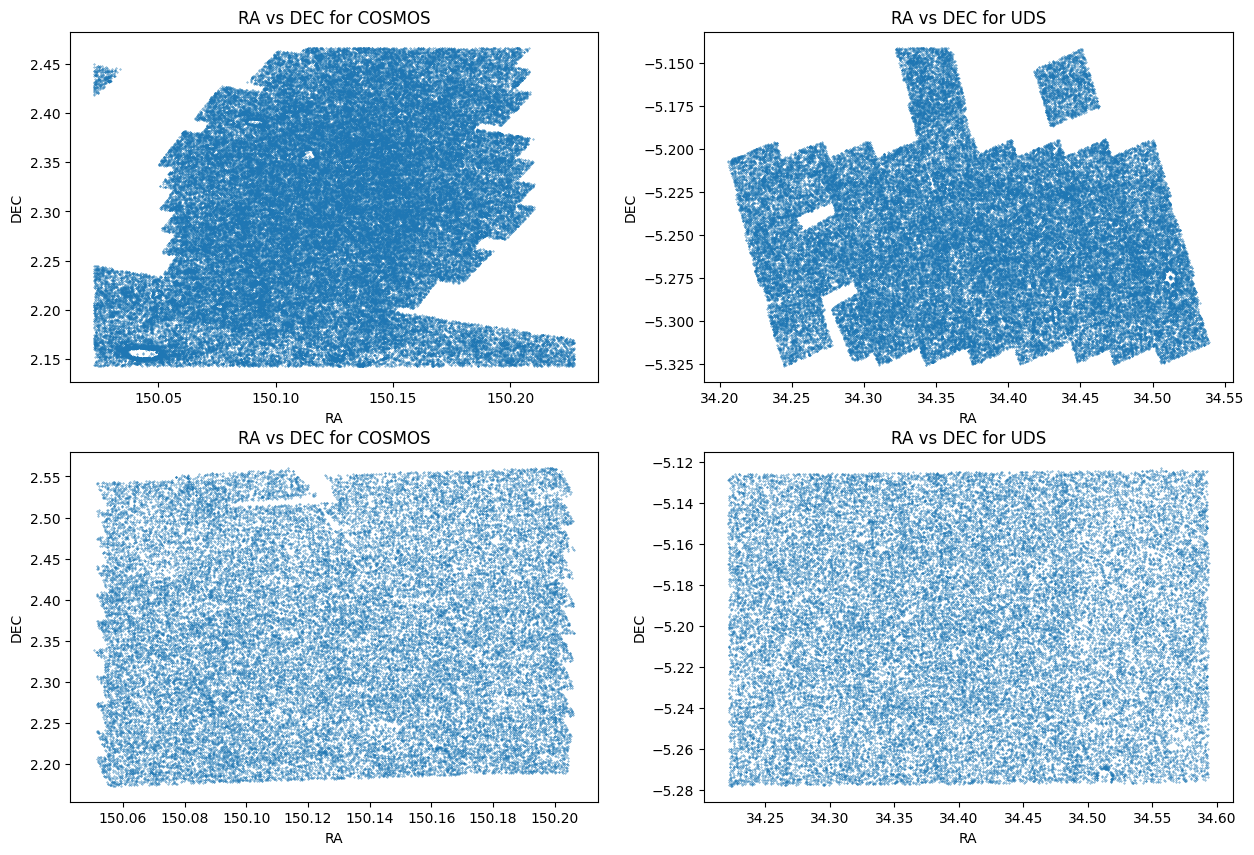

In [23]:
# Plotting the RA and DEC in different plots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(ra_pc,dec_pc,s=0.1)
plt.title('RA vs DEC for COSMOS')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.subplot(2,2,2)
plt.scatter(ra_pu,dec_pu,s=0.1)
plt.title('RA vs DEC for UDS')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.subplot(2,2,3)
plt.scatter(ra_c,dec_c,s=0.1)
plt.title('RA vs DEC for COSMOS')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.subplot(2,2,4)
plt.scatter(ra_u,dec_u,s=0.1)
plt.title('RA vs DEC for UDS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

### Now we start matching the cataloges!

# Start by checking the COSMOS RA and then do the same for DEC

In [24]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('RA', 'DEC'))
rejected_table = QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(ra_pc)):
    for j in range(len(ra_c)):
        if abs(ra_pc[i] - ra_c[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([ra_pc[i], dec_pc[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([ra_pc[i], dec_pc[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))


Matching sources:
116247

Rejected sources:
0


In [25]:
# Create empty tables for matching and rejected sources
matching_table1 = QTable(names=('RA', 'DEC'))
rejected_table1= QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(dec_pc)):
    for j in range(len(dec_c)):
        if abs(ra_pc[i] - ra_c[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table1.add_row([dec_pc[i], dec_pc[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table1.add_row([ra_pc[i], dec_pc[i]])
        
# Print the matching and rejected tables. The length should be how many sources are in each table
print('Matching sources:')
print(len(matching_table1))
print('\nRejected sources:')
print(len(rejected_table1))

Matching sources:
116247

Rejected sources:
0


### Now I'm doing the same with the UDS

In [26]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('RA', 'DEC'))
rejected_table = QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(ra_pu)):
    for j in range(len(ra_u)):
        if abs(ra_pu[i] - ra_u[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([ra_pu[i], dec_pu[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([ra_pu[i], dec_pu[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))

Matching sources:
78275

Rejected sources:
0


In [27]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('RA', 'DEC'))
rejected_table = QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(dec_pu)):
    for j in range(len(dec_u)):
        if abs(dec_pu[i] - dec_u[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([ra_pu[i], dec_pu[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([ra_pu[i], dec_pu[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))

KeyboardInterrupt: 

### All of these values fall within the PSF threshold. Since the PRIMER catalog has a larger number of stars, it can only run up to the number of stars in merged catalogs. In the end they all fell within the PSF threshold

## Now we have to check how the photometric values compare and then plot thier redshifts. First I need to grab the photometric values from the cataloges and append them to the PRIMER catalog

In [ ]:
zphote_table = QTable([hdulistPUF[1].header['zphote']], names=['zphote'])
# Grab the header ZPHOTE from hdulistPUF
header_zphote = hdulistPUF[1].header['zphote']

# Append the header to hdulistPU
hdulistPU.append(header_zphote)

## Grabbing the ZPHOTE values

In [28]:
zphote_pc = hdulistPC[1].data['zphote']
zphote_pu = hdulistPU[1].data['zphote']
zphote_c = hdulistC[1].data['zphote']
zphote_u = hdulistU[1].data['zphote']

#Makeing a table with the zphote values
t4 = QTable([zphote_pc], names=('zphote'))
t5 = QTable([zphote_pu], names=('zphote'))
t6 = QTable([zphote_c], names=('zphote'))
t7 = QTable([zphote_u], names=('zphote'))

KeyError: "Key 'zphote' does not exist."

In [ ]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('Matching Redshifts'))
rejected_table = QTable(names=('Matching Redshifts'))

# Loop through Zphote_PC and Zphote_C to find matches
for i in range(len(Zphote_PC)):
    for j in range(len(Zphote_C)):
        if abs(Zphote_PC[i] - Zphote_C[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([Zphote_PC[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([Zphote_PC[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))

KeyError: "Keyword 'ZPHOTE' not found."

In [ ]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('Matching Redshifts'))
rejected_table = QTable(names=('Matching Redshifts'))

# Loop through Zphote_PC and Zphote_C to find matches
for i in range(len(Zphote_PU)):
    for j in range(len(Zphote_U)):
        if abs(Zphote_PC[i] - Zphote_C[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([Zphote_PC[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([Zphote_PC[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table1))
print('\nRejected sources:')
print(len(rejected_table1))

## Now lets plot the redshifts

In [ ]:
import matplotlib.pyplot as plt

# Plot the redshift comparison from the first matching table
plt.plot(matching_table['Matching Redshifts'])
plt.xlabel('Index')
plt.ylabel('Redshift')
plt.title('Redshift Comparison - Matching Table ')
plt.plot(matching_table1['Matching Redshifts COSMOS'])

plt.xlabel('Index')
plt.ylabel('Redshift')
plt.title('Redshift Comparison - Matching Table UDS')
plt.show()


## Finally append the M-Med header to the PRIMER catalog 

In [ ]:
# Grab the m-med header from hdulistPUF
header_m_med = hdulistPUF[1].header['m-med']

# Append the header to hdulistPU
hdulistPU.append(header_m_med)

# Append the header to hdulistPC
hdulistPC.append(header_m_med)